<a href="https://colab.research.google.com/github/Denniskag/Data_Visualisation/blob/main/Data_Vizualisation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

In this tutorial, we shall analyze the Top 250 Football transfers from 2000 to 2018 [dataset](https://https://www.kaggle.com/vardan95ghazaryan/top-250-football-transfers-from-2000-to-2018) from Kaggle. The dataset set shows the name, age, position, transfer fees among others of various players.



#Importing dataset

In [ ]:
pip install opendatasets --upgrade

In [ ]:
import opendatasets as od

In [ ]:
od.download('https://www.kaggle.com/vardan95ghazaryan/top-250-football-transfers-from-2000-to-2018')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: denniskag
Your Kaggle Key: ··········


100%|██████████| 107k/107k [00:00<00:00, 28.7MB/s]

In [ ]:
import pandas as pd

In [ ]:
transfers_df = pd.read_csv('/content/top-250-football-transfers-from-2000-to-2018/top250-00-19.csv')

In [ ]:
transfers_df

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56810000
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40000000
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NaN,36150000
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,NaN,34500000
...,...,...,...,...,...,...,...,...,...,...
4695,Jasmin Kurtic,Attacking Midfield,29,Atalanta,Serie A,SPAL,Serie A,2018-2019,5000000.0,4800000
4696,Tchê Tchê,Central Midfield,25,Palmeiras,Série A,Dynamo Kyiv,Premier Liga,2018-2019,3000000.0,4800000
4697,Silvan Widmer,Right-Back,25,Udinese Calcio,Serie A,FC Basel,Super League,2018-2019,8500000.0,4500000
4698,Yuya Osako,Second Striker,28,1. FC Köln,2.Bundesliga,Werder Bremen,1.Bundesliga,2018-2019,4500000.0,4500000


In [ ]:
transfers_df.shape

(4700, 10)

In [ ]:
transfers_df.columns

Index(['Name', 'Position', 'Age', 'Team_from', 'League_from', 'Team_to',
       'League_to', 'Season', 'Market_value', 'Transfer_fee'],
      dtype='object')

In [ ]:
transfers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          4700 non-null   object 
 1   Position      4700 non-null   object 
 2   Age           4700 non-null   int64  
 3   Team_from     4700 non-null   object 
 4   League_from   4700 non-null   object 
 5   Team_to       4700 non-null   object 
 6   League_to     4700 non-null   object 
 7   Season        4700 non-null   object 
 8   Market_value  3440 non-null   float64
 9   Transfer_fee  4700 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 367.3+ KB


## Data Preparation & Cleaning
In this section, we shall deal with all null values and make sure there no more mising values

In [ ]:
transfers_df.isnull().sum()

Name               0
Position           0
Age                0
Team_from          0
League_from        0
Team_to            0
League_to          0
Season             0
Market_value    1260
Transfer_fee       0
dtype: int64

In [ ]:
transfers_df['Market_value'].fillna(value = transfers_df['Market_value'].mean(), inplace= True)

In [ ]:
transfers_df.isnull().sum()

Name            0
Position        0
Age             0
Team_from       0
League_from     0
Team_to         0
League_to       0
Season          0
Market_value    0
Transfer_fee    0
dtype: int64

In [ ]:
transfers_df

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,8.622469e+06,60000000
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,8.622469e+06,56810000
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,8.622469e+06,40000000
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,8.622469e+06,36150000
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,8.622469e+06,34500000
...,...,...,...,...,...,...,...,...,...,...
4695,Jasmin Kurtic,Attacking Midfield,29,Atalanta,Serie A,SPAL,Serie A,2018-2019,5.000000e+06,4800000
4696,Tchê Tchê,Central Midfield,25,Palmeiras,Série A,Dynamo Kyiv,Premier Liga,2018-2019,3.000000e+06,4800000
4697,Silvan Widmer,Right-Back,25,Udinese Calcio,Serie A,FC Basel,Super League,2018-2019,8.500000e+06,4500000
4698,Yuya Osako,Second Striker,28,1. FC Köln,2.Bundesliga,Werder Bremen,1.Bundesliga,2018-2019,4.500000e+06,4500000


##Exploratory Analysis and Visualization
In this section, we shall ask questions and answer them using visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


From which leagues are players bought the most?

In [ ]:
transfers_df.League_from.nunique()

118

In [ ]:
top_league = transfers_df.League_from.value_counts().head(20)
top_league

Premier League        608
Serie A               602
Ligue 1               428
LaLiga                418
1.Bundesliga          265
Série A               199
Championship          197
Eredivisie            190
Liga NOS              178
Premier Liga          169
Super League          108
Serie B               100
Süper Lig             100
Jupiler Pro League     91
 Brazil                89
Torneo Final           84
 Argentina             66
LaLiga2                59
First Division         58
Ligue 2                47
Name: League_from, dtype: int64

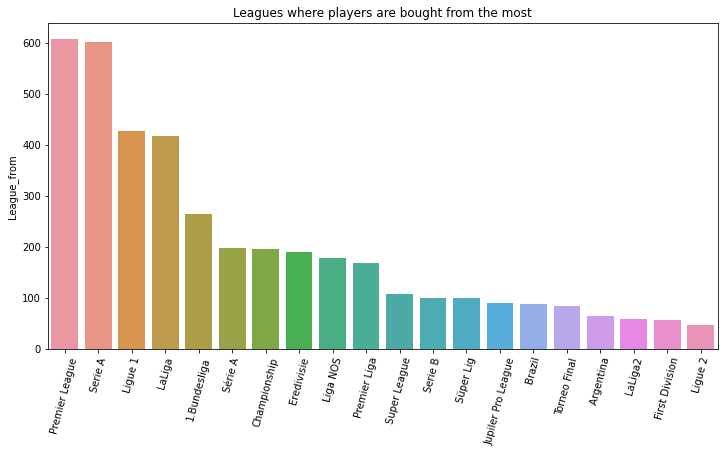

In [ ]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Leagues where players are bought from the most')
sns.barplot(x=top_league.index, y=top_league);

To which leagues are players sold to the most?

In [ ]:
transfers_df.League_to.nunique()

65

In [ ]:
buying_league = transfers_df.League_to.value_counts().head(20)
buying_league

Premier League        1256
Serie A                739
LaLiga                 525
1.Bundesliga           422
Ligue 1                397
Premier Liga           328
Süper Lig              143
Liga NOS               127
Super League           122
Eredivisie             108
Championship            72
Série A                 49
Liga MX Clausura        30
Jupiler Pro League      27
Serie B                 26
 England                24
First Division          23
 Scotland               20
Premiership             20
UAE Gulf League         20
Name: League_to, dtype: int64

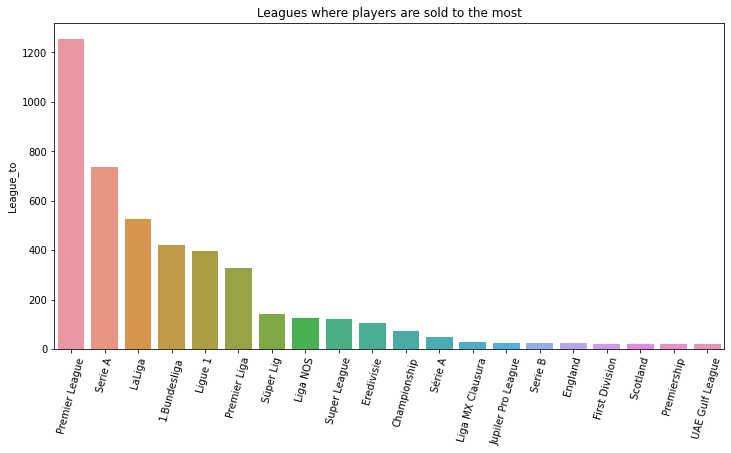

In [ ]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Leagues where players are sold to the most')
sns.barplot(x=buying_league.index, y=buying_league);

Whats the age group of players bought or sold?


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


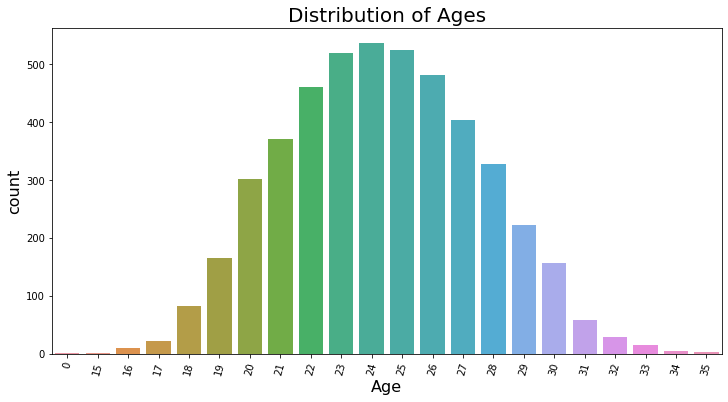

In [ ]:
plt.figure(figsize = (12, 6))
plt.xticks(rotation = 75)
plt.title("Distribution of Ages", fontsize = 20)
plt.ylabel("Count", fontsize = 16)
plt.xlabel("Age", fontsize= 16)
sns.countplot(sorted(transfers_df["Age"]));

Which season had the highest transfer fee?

Text(0, 0.5, 'Transfer Fee')

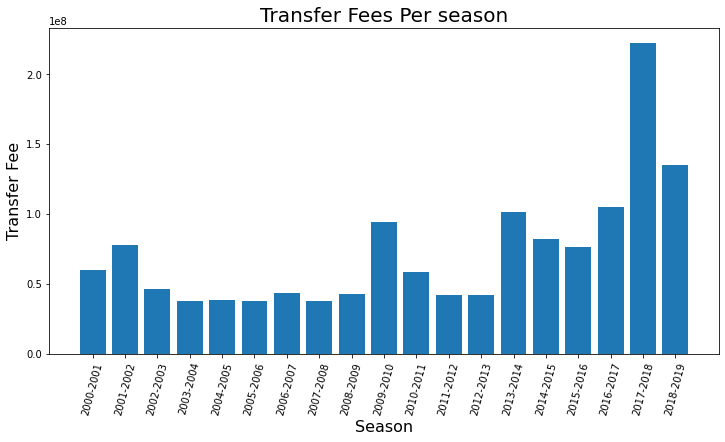

In [ ]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.bar( transfers_df.Season, transfers_df.Transfer_fee);
plt.title("Transfer Fees Per season", fontsize = 20)
plt.xlabel('Season', fontsize = 16)
plt.ylabel('Transfer Fee', fontsize = 16)


What is the Most Purchased position played by players?

In [ ]:
most_pos = transfers_df.Position.value_counts().head(10)
most_pos

Centre-Forward        1218
Centre-Back            714
Central Midfield       487
Attacking Midfield     426
Defensive Midfield     411
Right Winger           305
Left Winger            267
Left-Back              225
Right-Back             181
Goalkeeper             180
Name: Position, dtype: int64

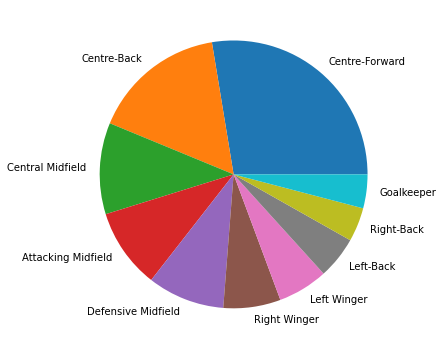

In [ ]:
plt.figure(figsize=(6,12))
plt.pie(most_pos, labels=most_pos.index );

Which clubs have bought the most players in transfers?

In [ ]:
most_spending_teams = transfers_df.Team_to.value_counts().head(20)
most_spending_teams

Inter              97
Chelsea            96
Man City           94
Spurs              93
Juventus           87
Liverpool          85
AS Roma            77
Real Madrid        75
FC Barcelona       70
Atlético Madrid    69
AC Milan           68
Paris SG           66
Man Utd            65
Everton            63
Arsenal            61
Newcastle          61
Monaco             61
Marseille          60
FC Porto           60
SSC Napoli         58
Name: Team_to, dtype: int64

Who is the most expensive player in the whole world?

In [ ]:
max1 = max(transfers_df['Transfer_fee']) 
most_exp = transfers_df.Name[transfers_df.Transfer_fee == max1]
most_exp

4211    Neymar
Name: Name, dtype: object

who is cheapest player ever sold?

In [ ]:
min1 = min(transfers_df['Transfer_fee']) 
most_chp = transfers_df.Name[transfers_df.Transfer_fee == min1]
most_chp

741    Rémo Meyer
Name: Name, dtype: object

who is the most expensive player in premier league?


In [ ]:
epl_df = transfers_df[transfers_df.League_to=='Premier League']

In [ ]:
epl_max = max(epl_df['Transfer_fee']) 
most_exp_epl = epl_df.Name[epl_df.Transfer_fee == epl_max]
most_exp_epl

3961    Paul Pogba
Name: Name, dtype: object

Who is the most expensive player bought by Real Madrid?

In [ ]:
madrid_df = transfers_df[transfers_df.Team_to=='Real Madrid']

In [ ]:
madrid_max = max(madrid_df['Transfer_fee']) 
most_exp_madrid = madrid_df.Name[madrid_df.Transfer_fee == madrid_max]
most_exp_madrid

3217    Gareth Bale
Name: Name, dtype: object